In [3]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-07-27 11:46:52.469432


100% | ETA:  0:00:00 | Calculating - Locked X (Locking steps tried 20/10000)   

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 69.1037 seconds

--- Output info ---

Run date and time: 2022-07-27 11:46:52.471525
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, rot, z

One xaxis used: ['xaxis ETM xbeta lin -0.0003 0.0003 800']
PDrefl   : min = -9.998186055993000e-09 max = 9.970915424750979e-09
QPDrefl1 : min = -5.464729981527749e-04 max = 5.464722359105810e-04
QPDrefl2 : min = -7.766049964718211e-05 max = 7.766222733994579e-05
circ     : min = 4.319074361673920e-01 max = 1.059752170223950e+04
z        : min = -4.763582729984480e+01 max = -1.869754779945090e-07
rot      : min = -3.000000000000000e-04 max = 3.000000000000000e-04


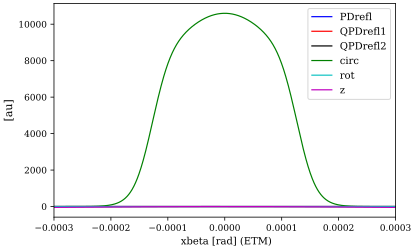

In [4]:
kat4 = finesse.kat()
kat4.verbose=True
kat4.parse("""


mod EOM 55.55M 0.001 1 pm nin n0                #modulator
l laser 30 0 nin                                # input laser                  
maxtem 3                

s s0 0 n0 n1

bs pickoff 0.1 0.9 0 45 n1 dump n2 n3           #bs to split power between detectors and main cavity  ##Setup-> http://www.gwoptics.org/finesse/examples/autoalignment.php ##
s s1 0.1 n2 n4                                  
m ITM 0.98997 0.01 0 n4 n5               
s scavity 3.3 n5 n6                   
m ETM 0.99996 0.00001 0 n6 n7               
s s2 0.1 n3 n8                       
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump            #bs to split power between two detectors 

s sQPD1 0.1 n9 n11                   
s sQPD2 0.1 n10 n12                  
cav cavity ITM n5 ETM n6 
trace 2                  

attr ETM Rc 11.3         
attr ETM xbeta 0         
attr ITM xbeta 0         

pd1 PDrefl 55.55M 0 n8*                         # refl
attr sQPD1 g 20                                 #guoy phase for det1
attr sQPD2 g 110                                #guoy phase for det2

pd1 QPDrefl1 55.55M 0 n11                       #Split detector1 refl
pdtype QPDrefl1 x-split   

pd1 QPDrefl2 55.55M 0 n12                       #Split detector2 refl
pdtype QPDrefl2 x-split   


pd circ n5                                      #circ power#

                                        ### cavity lock ###
set err PDrefl re    
lock z $err 3000 10n 
put ETM phi $z       
noplot z             
#xaxis ITM xbeta lin 0 0.8m 500 
xaxis ETM xbeta lin -0.3m 0.3m 800              #rotate ETM mrad  
func rot = $x1*(1)
put ITM xbeta $rot                              #rotate ITM with the same value, multiply (-1) for hard mode 

#x2axis ITM xbeta lin -0.3m 0.3m 800            #for 3d graph plotting

""")
out3 = kat4.run()
out3.info()
out3.plot()



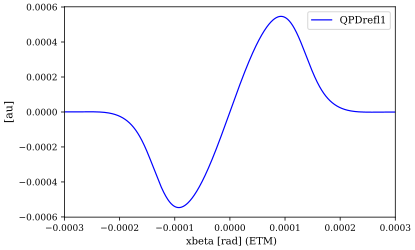

In [5]:
out3.plot(['QPDrefl1'])

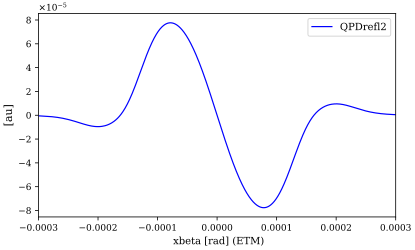

In [6]:
out3.plot(['QPDrefl2'])

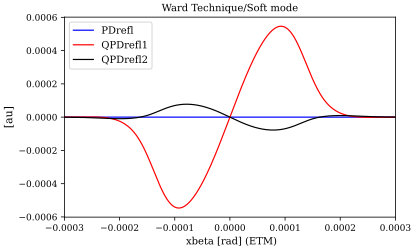

In [7]:
out3.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique/Soft mode')

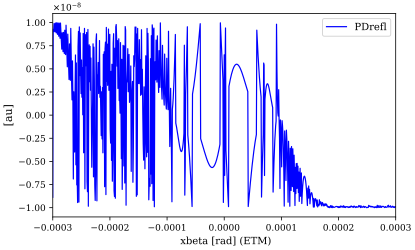

In [8]:
out3.plot(['PDrefl'])

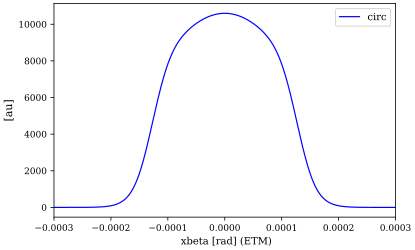

In [9]:
out3.plot(['circ'])

In [10]:
## for 3d plotting ##

#plt.figure(figsize = (80,8))
#plt.imshow(out3['QPDrefl1'],cmap='gray',interpolation='nearest')
#plt.colorbar()
#plt.show()
#plt.figure(figsize = (80,8))
#plt.imshow(out3['QPDrefl2'],cmap='gray',interpolation='nearest')
#plt.colorbar()
#plt.show()
#plt.figure(figsize = (80,8))
#plt.imshow(out3['circ'],cmap='jet')
#plt.colorbar()
#plt.show()